## Prelab 2: Baseband Wireline Communication

The purpose of this prelab is to bridge the lecture content on digital packets, rectangular signaling, network layers, and link performance with the next lab, which focuses on establishing a communication link between a transmitter and receiver..

## Digital Signaling Waveforms

### Exercise 2.1: Return-to-Zero Magnitude Spectrum

Digital data signaling is the process of converting digital information into a format suitable for transmission over communication channels. This conversion involves translating data bits into specific signal patterns, such as electrical or optical pulses, that can effectively represent the original information. These encoded signals enable efficient transmission, minimizing errors, and maximizing the use of available bandwidth, ensuring accurate and reliable communication between devices or across networks.

The following figure depicts return-to-zero (RZ) encoding:

![Return to Zero (RZ) Signaling](./Images/Lec06-03.png)




#### Question 2.1a:

Suppose that digital data is communicated using an antipodal RZ waveform having amplitude = 1 and 40% duty cycle. If the magnitude spectrum of the RZ waveform is as shown in the figure below, what is the signaling interval or bit / symbol period $T_s$?

![Magnitude Spectrum for 40% Duty Cycle RZ Waveform](./Images/PL2_01.png)

*ANSWER:*

Main lobe bandwidth is $\frac{1}{T_0}$.

if $T_0$ is 40% T_s, T_s = $\frac{1}{BW}*\frac{10}{4}$ 

$BW = 2.5Mhz$, $T_s = \frac{1}{2.5MHz} * \frac{10}{4} = 0.000001$

$T_s=$ [$1 \mu s$]

#### Question 2.1b:

Modify the code cell below to plot the magnitude spectrum of an antipodal RZ waveform having amplitude = 0.5, symbol period 0.1 $\mu$ sec, and 60% duty cycle.

*ANSWER:*

Text(0, 0.5, 'Magnitude')

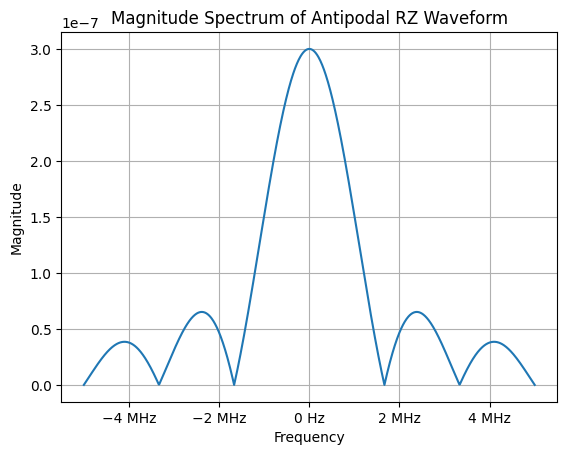

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, FixedFormatter

T_s = 1e-6 # Symbol Period (sec)
D = 0.6# Duty Cycle (b/w 0 and 1)
T0 = D*T_s # Return to Zero duration (from the time it first leaves zero)
A = 0.5 # Amplitude of the waveform
f = np.linspace(start = -5/T_s, stop = 5/T_s, num = 1000) # Frequency axis

# Antipodal Return-to-Zero Spectrum
# Remember: Fourier Transform of Rect function is Sinc function
X = A*T0*np.sinc(f*T0)

# modify the below line and uncomment it when done
plt.plot(f,np.abs(X)) #where X(f) stands for the frequency spectrum of the waveform.

plt.gca().xaxis.set_major_formatter(EngFormatter(unit='Hz'))
plt.xlabel('Frequency')
plt.grid()
plt.title('Magnitude Spectrum of Antipodal RZ Waveform')
plt.ylabel('Magnitude')

## Data Throughput

### Exercise 2.2: Throughput from Packet Parameters

The term data throughput refers to the rate at which digital information is transmitted and processed by the receiver. It is typically measured in bits or bytes per second. In short, it represents the amount of data transferred over a network, channel, or system within a specific timeframe.

Suppose digital data is transmitted on a dedicated communication link using packets shown in the figure below with the following characteristics: each packet is $24$ bytes total, each header is $40$ bits, and each trailer is $0$ bits.

![Packet Format](./Images/Lec06-01.png)

The transmission bit rate is $80$ Mbps. What is the effective throughput of this system? (Note: Assume that the packet does not contain a trailer)

*ANSWER:*

Given that each packet is $\frac{40}{24*8}$ of non-payload data and the streaming rate is 80, the final data throughput is $80\cdot(1-\frac{40}{24*8}) = 63.3333333 Mbps$ 

## Bit/Packet Errors

Distortions and disruptions in a communication system may introduce a significant amount of errors in the transmitted data. These errors can arise due to factors like signal attenuation, interference from other wireless devices, environmental obstacles, multipath propagation where signals take multiple paths to reach the receiver causing phase shifts and signal distortion, etc. As a result, the received data may contain inaccuracies or missing information, leading to some packets being lost or discarded, which will result in reduced data throughput. High error rates can degrade the quality of communication, causing delays, retransmissions, and decreased overall performance in wireless networks.

Errors are inevitable in any practical link, a communications system must always be designed keeping these errors in mind. The following problem deals with the probability of bit error on an unreliable link, where we have some knowledge about the unreliability of the link. This in turn helps specify what kind of error detection and/or correction technique should be implemented to mitigate the unreliability of the link.


### Exercise 2.3: Packet Errors and Single Parity Check

Suppose we need to transfer $16$ bit data through an unreliable link. Assume that the probability of a bit error is $0.1$, and that bit errors occur independently. 

#### Question 2.3a:

What is the probability that a received packet contains at least one error?

*ANSWER*:


[Probability of correctly receiving each bit is 0.9. to correctly receive all is $0.9^{16}$ therefore, the probability that at least on is wrong is $1-(0.9^{16}) = 0.814697981115$]

#### Question 2.3b:

What is the probability that a received packet contains at least two errors?

*ANSWER*:

This will be the $1-p(0)-p(1)$, leaving the probability that at least two bits had errors. We know that $p(0) = 0.9^{16}$. $p(1) = 16 * 0.1 * (0.9^{15})$. The final probability is $\fbox{0.485272169763}$


#### Question 2.3c:

Suppose that we append one parity bit to our data/bit stream, in order to detect errors. What is the probability that the parity-check succeeds even though the data contains errors? (In short, we want to calculate the probability of not being able to detect already present errors in our data.)

*ANSWER:*

given a parity bit at the end, the odds that we cannot detect errors are the odds that there are an even number of errors. This is $1 - p(1) - p(3) - p(5) - p(7) - p(9) - p(11) - p(13) - p(15)$ This can also be written as $\frac{1+(1-2\cdot0.1)^{16}}{2} - 0.9^{16} = \fbox{0.329}$

## UDP Datagrams

Data packets are fundamental units of data in network communication, consisting of structured information that includes both the actual payload being transmitted and control information, such as headers and trailers. These packets are formatted blocks of data used for efficient and organized transmission across networks. Each packet contains a portion of the overall message or data being sent, along with additional details such as the source and destination addresses, sequencing information, error-checking codes, and other control data. This packetized approach optimizes data transmission, allows for better handling of network congestion, and facilitates error detection and correction within communication systems.

The UDP Datagram is one such packet structure. It consists of header followed by payload/data. The header consists of 4 fields, each of which is 2 bytes (16 bits).

https://en.wikipedia.org/wiki/User_Datagram_Protocol

### Exercise 2.4: UDP Datagram Study

#### Question 2.4a:

Determine the maximum length of data/payload in bytes. Assume that additional 20 bytes are used by the IPv4 header.

*ANSWER:*

The maximum length is 65,507 bytes (65,535 bytes − 8-byte UDP header − 20-byte IP header).

#### Question 2.4b:

Suppose a UDP datagram reads as follows (in hex): ef c0 17 76 00 0c 00 00 85 c7 30 d2. From this, determine the value of source port number, destination port number, datagram length, and the payload. Assume that checksum is not used.

*ANSWER:*

12 bytes:

all big endian

Bytes 0-1 -> source port: ef c0 = port 61376

Bytes 2-3 -> destination port: = 6006

Bytes 4-5 -> length: 000c = 12

Bytes 6-7 -> checksum: 00 00 = 0 (not used)

Bytes 8-11-> Payload: 85 c7 30 d2 = 2244423890


## Delay Analysis

Analyzing delay refers to analyzing the amount of time a packet spends within two points in a network or a communication system. This time is associated with the time required to process packets and also the time taken by a packet in between the two nodes. This analysis also helps us to identify the average number of packets within a network or a communication system, at any given time.


### Exercise 2.5: Simple Queueing Model

Suppose two nodes, numbered $1$ and $2$, are communicating with each other. The average length of packets arriving at node $1$ is $L$ bytes. The communication link connecting node $1$ to node $2$ has data rate $R$ Bps (bytes per second), and can only accept one packet at a time. Node $2$ can only process one packet at a time, and spends an average of $T$ seconds on a packet. Assume steady-state behavior and an arrival rate of $\lambda$ packets/sec at node $1$. Define the service rate as $\mu \triangleq R/L$ packets per second.

#### Question 2.5a:

How long does it take to transmit packet from node $1$ over the link?

*ANSWER:*

Travel time = $\frac{L}{R}$ = $\frac{1}{\mu}$

Use M/D/1 queuing model (refer to Lect 8 which is based on Link Performance) for the following questions.

#### Question 2.5b:

Assuming $\lambda < \mu$, what is the average number of packets at node $1$ and the link?

*ANSWER:*

$\rho = \frac{\lambda}{\mu}$

$M = \rho + \frac{1}{2}(\frac{\rho^2}{1-\rho})$



#### Question 2.5c:

Assuming $\lambda$ packets / sec is also the arrival rate at node $2$, what is the average number of packets at node $2$?

*ANSWER:*

T seconds per packet, $\lambda$ packets/sec

average number of packets at node 2 is $\lambda \cdot T$

#### Question 2.5d:

What is the average delay per packet in the entire system?

(Hint: Apply Little's Law https://en.wikipedia.org/wiki/Little%27s_law)

*ANSWER*:

Average number of packets in the entire system is $\rho + \frac{1}{2}(\frac{\rho^2}{1-\rho}) + \lambda \cdot T$

using little's law, we divide this by the incoming packet rate $\lambda$ to get the average time spent in the system $\frac{\rho + \frac{1}{2}(\frac{\rho^2}{1-\rho}) + \lambda \cdot T}{\lambda}$